# ANALYSES

###### Trend 1 : As we get closer to the equator, the temperature will increase significantly as implied by the Max Temp v Latitude plot
###### Trend 2 : Looking at the Max Wind speeds plot, we can see that at 0 degrees, theres a cluster of cities. This implies that cities closer to 0 degree latitudes have lower wind speeds than not.
###### Trend 3 : Humidity percentages increase closer to the equator 

--------------------------------------

##### Import Dependencies

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import requests as req
from citipy import citipy
import random
import numpy as np
from array import array
import seaborn as sns

##### Retrieve Weather API Information

In [3]:
weather_url = 'https://api.openweathermap.org/data/2.5/weather?'
weather_apiKey = 'e5613f31e67384f3359727ac648d4bca'

##### Generating 600 random cities


In [4]:
lat =  np.random.uniform(-90,90,600)
long = np.random.uniform(-180,180,600)
coordinates_df = pd.DataFrame({'Latitude':lat, 'Longtitude':long})
coordinates_df.head()


,Latitude,Longtitude
0,-42.814910,-56.963436
1,-77.017918,-89.538164
2,-80.149802,-58.553076
3,-28.841316,64.275114
4,46.518346,125.518793


In [5]:
#Here we are iterrating through the rows of the dataframe and using the citipy library to find the nearest city for
##each corresponding lat,lon pair
for index,row in coordinates_df.iterrows():
    lat= row['Latitude']
    lon = row['Longtitude']
    city = citipy.nearest_city(lat, lon).city_name
    coordinates_df.set_value(index,'Nearest City',city)
coordinates_df.dropna(how='any')    
coordinates_df.head()

,Latitude,Longtitude,Nearest City
0,-42.814910,-56.963436,necochea
1,-77.017918,-89.538164,punta arenas
2,-80.149802,-58.553076,ushuaia
3,-28.841316,64.275114,mahebourg
4,46.518346,125.518793,anda


##### Perform API Calls

In [6]:

weather_info=[]
units = "metric"

for index,row in coordinates_df.iterrows():
    nc = row['Nearest City']
    queryString = weather_url + "appid=" + weather_apiKey + "&q=" + nc + "&units=" + units
    weather_response = req.get(queryString).json()
    weather_info.append(weather_response)

# weather_response
weather_info

[{'base': 'stations',
  'clouds': {'all': 12},
  'cod': 200,
  'coord': {'lat': -38.55, 'lon': -58.74},
  'dt': 1518723287,
  'id': 3430443,
  'main': {'grnd_level': 1024.78,
   'humidity': 69,
   'pressure': 1024.78,
   'sea_level': 1030.33,
   'temp': 27.57,
   'temp_max': 27.57,
   'temp_min': 27.57},
  'name': 'Necochea',
  'sys': {'country': 'AR',
   'message': 0.0038,
   'sunrise': 1518686665,
   'sunset': 1518735179},
  'weather': [{'description': 'few clouds',
    'icon': '02d',
    'id': 801,
    'main': 'Clouds'}],
  'wind': {'deg': 19, 'speed': 4.76}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -53.16, 'lon': -70.91},
  'dt': 1518721200,
  'id': 3874787,
  'main': {'humidity': 81,
   'pressure': 993,
   'temp': 11.68,
   'temp_max': 12,
   'temp_min': 11},
  'name': 'Punta Arenas',
  'sys': {'country': 'CL',
   'id': 4642,
   'message': 0.0058,
   'sunrise': 1518687828,
   'sunset': 1518739822,
   'type': 1},
  'visibility': 10000,
  'wea

##### Performing API calls to retrieve variables of interest in json dump

In [7]:
units = "metric"
  
for index,row in coordinates_df.iterrows():
    nc = row['Nearest City']
    queryString = weather_url + "appid=" + weather_apiKey + "&q=" + nc + "&units=" + units
    try: 
        weather_response = req.get(queryString)
        weather_data = req.get(queryString).json()

        coordinates_df.set_value(index,'Maximum Temperature',weather_data['main']['temp_max'])
        coordinates_df.set_value(index,'Humidity',weather_data['main']['humidity'])
        coordinates_df.set_value(index,'Cloudiness',weather_data['clouds']['all'])
        coordinates_df.set_value(index,'Wind Speed',weather_data['wind']['speed'])
       
    except:
        print('City does not exist')

coordinates_df
coordinates_df.rename(columns={'Maximum Temperature': 'Max_Temp'}, inplace=True)
coordinates_df.dropna()
coordinates_df.head()

City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist
City does not exist


,Latitude,Longtitude,Nearest City,Max_Temp,Humidity,Cloudiness,Wind Speed
0,-42.814910,-56.963436,necochea,27.57,69.0,12.0,4.76
1,-77.017918,-89.538164,punta arenas,12.00,81.0,75.0,3.10
2,-80.149802,-58.553076,ushuaia,15.00,54.0,75.0,7.36
3,-28.841316,64.275114,mahebourg,26.00,88.0,40.0,2.60
4,46.518346,125.518793,anda,-18.08,65.0,68.0,0.91


--------------

# PLOTTING DATA

---------

## Latitude vs Maximum Temperature Plot

In [15]:
sns.lmplot('Latitude','Max_Temp',data=coordinates_df,fit_reg=False)
sns.set_style('darkgrid')
plt.title('City Latitude vs. Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.show()

ValueError: operands could not be broadcast together with shapes (2,) (600,) 

## Latitude vs Humidity Plot

In [1]:
sns.lmplot('Latitude','Humidity',data=coordinates_df,fit_reg=False)
sns.set_style('darkgrid')
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Latitude_vs_Humidity.png')
plt.show()

NameError: name 'sns' is not defined

## Latitude vs Cloudiness Plot

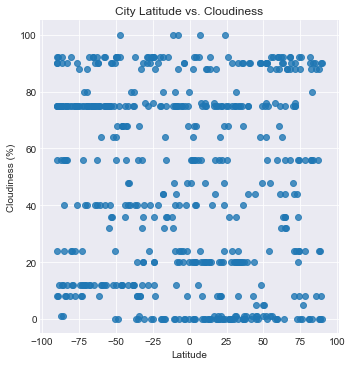

In [10]:
sns.lmplot('Latitude','Cloudiness',data=coordinates_df,fit_reg=False)
sns.set_style('darkgrid')
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs Wind Speed

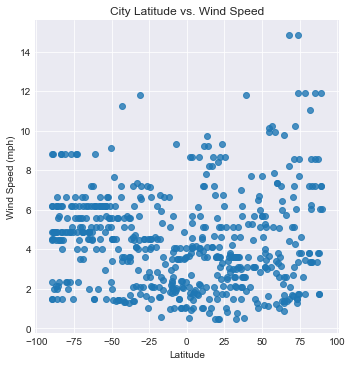

In [11]:
sns.lmplot('Latitude','Wind Speed',data=coordinates_df,fit_reg=False)
sns.set_style('darkgrid')
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()